In [18]:
%cd '../HOTS'
from Tools import runjit, netparam, histoscore, histoscore_lagorce, knn, accuracy
import numpy as np
import matplotlib.pyplot as plt

/home/antoine/homhots/HOTS/HOTS


# On the full dataset

In [19]:
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
R = 2
tau = 5
nbclust = [4,8,16]
filt = 2

timestr = '2021-03-29'
record_path = '../Records/EXP_03_NMNIST/'
dataset = 'nmnist'
nb_train = 60000
nb_test = 10000
ds = 1

nb_test = nb_test//ds
nb_train = nb_train//ds
print(f'training set size: {nb_train} - testing set: {nb_test}')

training set size: 60000 - testing set: 10000


In [ ]:
verbose = False
cumscore = []
cumscore_wei = []
for name in ['homhots']:#, 'homhots']:
    hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R, verbose=verbose)
    trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
    testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
    for k in range(5,20):
        score = knn(trainhistomap,testhistomap, k = k, weights = 'uniform')
        cumscore.append(score)
        #print(score)
        score = knn(trainhistomap,testhistomap, k = k, weights = 'distance')
        cumscore_wei.append(score)
        #print(score)
plt.plot(np.arange(5,15),cumscore)
plt.plot(np.arange(5,15),cumscore_wei)
plt.title('Visualization of the inflence of k for the k-NN classification')

In [ ]:
plt.plot(np.arange(5,20),cumscore)
plt.plot(np.arange(5,20),cumscore_wei)

In [ ]:
name = 'homhots'
verbose=True
hotshom, homeotest = netparam(name, filt, tau, nbclust, sigma, homeinv, jitter, timestr, dataset, R)#, nb_learn=50)
hotshom.plotlayer()
trainhistomap = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histo', dataset=dataset, verbose=verbose)
testhistomap = hotshom.running(homeotest = homeotest, train=False, nb_digit=nb_test, jitonic=jitonic, dataset=dataset, verbose=verbose)
JS_score = accuracy(trainhistomap,testhistomap,'JS')
print(f'Performances with Jensen-Shannon distance: {JS_score}')
kNN_score = knn(trainhistomap,testhistomap, k = 12, weights = 'distance')
print(f'Performances with  k-NN (k=12): {kNN_score}')
trainhistomapav = hotshom.running(homeotest=homeotest, nb_digit = nb_train, outstyle='histav', dataset=dataset, verbose=verbose)
print('---------Averaged histograms---------')
JS_score = accuracy(trainhistomap,testhistomap,'JS')
print(f'Performances with Jensen-Shannon distance: {JS_score}')
BA_score = accuracy(trainhistomap,testhistomap,'bhatta')
print(f'Performances with Bhattacharyya distance: {BA_score}')
EU_score = accuracy(trainhistomap,testhistomap,'eucli')
print(f'Performances with Euclidian distance: {EU_score}')

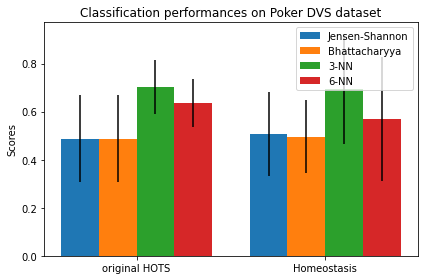

In [17]:
labels = ['original HOTS', 'Homeostasis']
JS_means = [np.mean(JS_score_histav), np.mean(JS_scorehom_histav)]
BA_means = [np.mean(BA_score_histav), np.mean(BA_scorehom_histav)]
kNN3_means = [np.mean(kNN3_score), np.mean(kNN3_scorehom)]
kNN6_means = [np.mean(kNN6_score), np.mean(kNN6_scorehom)]
JS_std = [np.std(JS_score_histav), np.std(JS_scorehom_histav)]
BA_std = [np.std(BA_score_histav), np.std(BA_scorehom_histav)]
kNN3_std = [np.std(kNN3_score), np.std(kNN3_scorehom)]
kNN6_std = [np.std(kNN6_score), np.std(kNN6_scorehom)]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3/2*width, JS_means, width, yerr = JS_std, label='Jensen-Shannon')
rects2 = ax.bar(x - width/2, BA_means, width, yerr = BA_std, label='Bhattacharyya')
rects3 = ax.bar(x + width/2, kNN3_means, width, yerr = kNN3_std, label='3-NN')
rects4 = ax.bar(x + 3/2*width, kNN6_means, width, yerr = kNN6_std, label='6-NN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification performances on Poker DVS dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()